# Plotting Phase fraction vs T

## Libraries

In [1]:
from pycalphad import Database, equilibrium, variables as v
import matplotlib.pyplot as plt
import numpy as np
from pycalphad.plot.utils import phase_legend

### Defining file paths for database

In [2]:
dbf_diretory = r'C:\PythonCode\Environments\Calphad\pycalphad\pycalphad codes\1 - databases\\'

### Load database

In [27]:
# dbf = Database(dbf_diretory + 'COST507_Sundman.tdb') #Aluminum database
dbf = Database(dbf_diretory + 'COST507_Original.tdb') #Aluminum database

### Determine phases

In [28]:
# phases = ['FCC_A1', 'LIQUID'] #For Al-Si
phases = list(dbf.phases.keys())
print(phases)

['LIQUID', 'ALB2', 'ALB12_ALPHA', 'ALB12_BETA', 'AL4C3', 'AL4SIC4', 'AL8SIC7', 'AL2_CEND', 'AL11_CEND3L', 'AL11_CEND3H', 'AL_CEND3L', 'AL_CEND3H', 'AL3_CEND', 'AL_CEND', 'ALCE_AMORPHOUS', 'ALCR2', 'AL4CR', 'AL8CR5_H', 'AL8CR5_L', 'AL9CR4_H', 'AL9CR4_L', 'AL11CR2', 'AL13CR2', 'ALCU_DELTA', 'ALCU_EPSILON', 'ALCU_ETA', 'ALCU_THETA', 'ALCU_PRIME', 'ALCU_ZETA', 'ALCULI_TB', 'ALCULI_R', 'ALCULI_T1', 'ALCULI_T2', 'ALCUZN_T', 'AL13FE4', 'AL2FE', 'AL5FE2', 'AL5FE4', 'ALFESI_ALPHA', 'ALFESI_BETA', 'ALFESI_GAMMA', 'ALFESI_DELTA', 'ALFESI_TAU1', 'ALFESI_TAU3', 'ALLI', 'AL2LI3', 'AL4LI9', 'AL12MG17', 'ALLIMG_TAU', 'ALMG_BETA', 'ALMG_EPS', 'ALMG_GAMMA', 'ALMGMN_T', 'AL11MN4', 'AL12MN', 'AL4MN', 'AL6MN', 'AL8MN5_D810', 'ALMNSI_ALPHA', 'ALMNSI_BETA', 'ALMNSI_DELTA', 'AL12MO', 'AL4MO', 'AL5MO', 'AL63MO37', 'AL8MO3', 'ALMO', 'ALN', 'ALND_AMORPHOUS', 'ALND2', 'ALSNZR', 'ALTI', 'ALM_D019', 'AL2TI', 'AL3M_D022', 'ALSN2ZR5', 'AL3TA2_L', 'AL3TA2_H', 'AL11TI5', 'AL7V', 'AL8V5', 'AL10V', 'AL23V4', 'AL12W', 'AL

In [29]:
# mass_fracs = {v.W('SI'): 12.0/100, v.W('CU'): 4.2/100, v.W('FE'): 0.5/100, v.W('MG'): 0.3/100, v.W('MN'): 0.3/100, v.W('ZN'): 0.5/100, v.W('NI'): 0.0/100, v.W('TI'): 1.0/100}
# mass_fracs = {v.W('SI'): 12.0/100, 
#               v.W('CU'): 4.2/100, 
#               v.W('FE'): 0.5/100, 
#               v.W('MG'): 0.3/100, 
#               v.W('MN'): 0.3/100, 
#               v.W('ZN'): 0.5/100, 
#               v.W('TI'): 1.0/100
#              }
mass_fracs = {v.W('MG'): 3.0/100, v.W('ZR'): 0.6/100, v.W('MN'): 0.5/100, v.W('TI'): 0.2/100}

conds = v.get_mole_fractions(mass_fracs, 'AL', dbf)

conds[v.T] = (283, 1473.15, 5) # Kelvin
conds[v.P] = 1e5 # Pa
conds[v.N] = 1

eq = equilibrium(dbf, ['MG', 'ZR', 'MN', 'TI', 'AL', 'VA'], phases, conds)

print(eq)

<xarray.Dataset> Size: 289kB
Dimensions:    (N: 1, P: 1, T: 239, X_MG: 1, X_MN: 1, X_TI: 1, X_ZR: 1,
                vertex: 6, component: 5, internal_dof: 11)
Coordinates:
  * N          (N) float64 8B 1.0
  * P          (P) float64 8B 1e+05
  * T          (T) float64 2kB 283.0 288.0 293.0 ... 1.468e+03 1.473e+03
  * X_MG       (X_MG) float64 8B 0.03345
  * X_MN       (X_MN) float64 8B 0.002466
  * X_TI       (X_TI) float64 8B 0.001132
  * X_ZR       (X_ZR) float64 8B 0.001782
  * vertex     (vertex) int64 48B 0 1 2 3 4 5
  * component  (component) <U2 40B 'AL' 'MG' 'MN' 'TI' 'ZR'
Dimensions without coordinates: internal_dof
Data variables:
    NP         (N, P, T, X_MG, X_MN, X_TI, X_ZR, vertex) float64 11kB 0.8788 ...
    GM         (N, P, T, X_MG, X_MN, X_TI, X_ZR) float64 2kB -8.939e+03 ... -...
    MU         (N, P, T, X_MG, X_MN, X_TI, X_ZR, component) float64 10kB -8.0...
    X          (N, P, T, X_MG, X_MN, X_TI, X_ZR, vertex, component) float64 57kB ...
    Y          (N, P, 

In [30]:
phases = sorted(set(eq.Phase.values.flatten()) - {''})
phase_handles, phasemap = phase_legend(phases)
print (phases)

[np.str_('AL12MN'), np.str_('AL3M_D022'), np.str_('AL3ZR'), np.str_('AL6MN'), np.str_('ALMG_BETA'), np.str_('FCC_A1'), np.str_('LIQUID')]


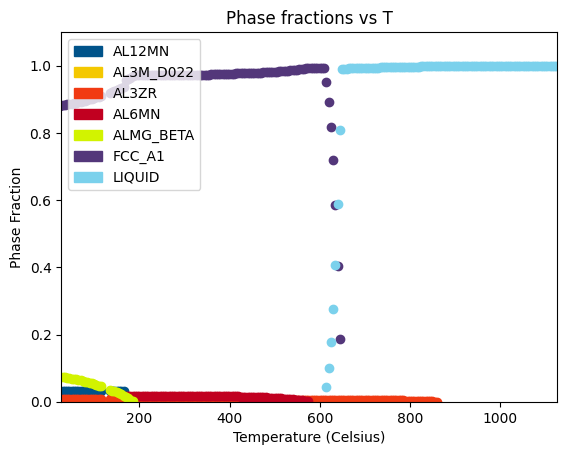

In [31]:
plt.gca().set_title('Phase fractions vs T')
plt.gca().set_xlabel('Temperature (Celsius)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((300-273.15, 1400-273.15))

for name in phases:
    plt.scatter(eq.T.broadcast_like(eq.NP)-273.15, eq.NP.where(eq.Phase == name), color=phasemap[name])
plt.gca().legend(phase_handles, phases, loc='upper left')

In [25]:
import pandas as pd
# Initialize a dictionary to store the data
data = {}

# Extract the temperature values and convert to Celsius
temperatures = (eq.T.broadcast_like(eq.NP).values).flatten()
data["Temperature (K)"] = temperatures

# Extract phase names
unique_phases = set(eq.Phase.values.flatten())  # Use set to get unique phase names

# Initialize a dictionary for phase fractions with default 0 for all temperatures
for phase in unique_phases:
    data[phase] = [0] * len(temperatures)  # Fill with zeros

# Fill phase fractions for each phase
for i, name in enumerate(eq.Phase.values.flatten()):
    phase_fractions = eq.NP.values.flatten()  # Flatten the phase fraction array
    data[name][i] = phase_fractions[i]  # Assign the fraction to the correct phase and temperature

# Convert to a DataFrame
df = pd.DataFrame(data)

# Group by temperature and sum up values for each phase to consolidate rows
df = df.groupby("Temperature (K)").sum().reset_index()

# Add a column for the sum of all phase fractions
df["Sum of Phases"] = df.drop(columns=["Temperature (K)"]).sum(axis=1)

# Save to Excel
output_file = 'consolidated_phase_fractions_with_sum.xlsx'
df.to_excel(output_file, index=False)

print(f"Data successfully exported to {output_file}")


Data successfully exported to consolidated_phase_fractions_with_sum.xlsx


In [26]:
import pandas as pd

# Initialize a dictionary to store the data
data = {}

# Extract the temperature values and convert to Celsius
temperatures = (eq.T.broadcast_like(eq.NP).values).flatten() - 273.15
data["Temperature (°C)"] = temperatures  # Updated column name for Celsius

# Extract phase names
unique_phases = set(eq.Phase.values.flatten())  # Use set to get unique phase names

# Initialize a dictionary for phase fractions with default 0 for all temperatures
for phase in unique_phases:
    if phase:  # Skip empty phase names
        data[phase] = [0] * len(temperatures)  # Fill with zeros

# Fill phase fractions for each phase
phase_fractions = eq.NP.values.flatten()  # Flatten the phase fraction array
for i, name in enumerate(eq.Phase.values.flatten()):
    if name:  # Skip empty phase names
        data[name][i] = phase_fractions[i]  # Assign the fraction to the correct phase and temperature

# Convert to a DataFrame
df = pd.DataFrame(data)

# Group by temperature and sum up values for each phase to consolidate rows
df = df.groupby("Temperature (°C)").sum().reset_index()

# Add a column for the sum of all phase fractions
df["Sum of Phases"] = df.drop(columns=["Temperature (°C)"]).sum(axis=1)

# Save to Excel
output_file = 'consolidated_phase_fractions_with_sum_celsius.xlsx'
df.to_excel(output_file, index=False)

print(f"Data successfully exported to {output_file}")


Data successfully exported to consolidated_phase_fractions_with_sum_celsius.xlsx
